**Задание 1**

1) Используя средства модуля [pandas](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/pandas.ipynb), определите среднюю, максималную, минимальную зарплату и среднюю, максималную, минимальную пенсию в Санкт-Петербурге в 2018 году.

2) Продемонстрируйте умение построения графиков (для произвольных значений) с помощью plot.


**Задание 2**

Для [файла](http://dfedorov.spb.ru/python3/forecast.html), расположенного в сети Интернет, напишите сценарий с использованием [модуля bs4](https://github.com/dm-fedorov/python3_intro/blob/master/lesson_13/bs4.ipynb), который извлекает данные и сохраняет их в файле формата CSV, где первый столбец - день недели, второй столбец - погода. 

**Переходим к решению первой задачи:**

Импортируем модуль pandas:

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Читаем содержимое csv файла:

In [45]:
data = pd.read_csv('opendata.csv', encoding='cp1251')
data.head()

,name,region,date,value
0,Количество заявок на потребительские кредиты,Россия,2013-01-15,571147
1,Количество заявок на потребительские кредиты,Россия,2013-02-15,504508
2,Количество заявок на потребительские кредиты,Россия,2013-03-15,628803
3,Количество заявок на потребительские кредиты,Россия,2013-04-15,836054
4,Количество заявок на потребительские кредиты,Россия,2013-05-15,867235


Далее пошаговый код...

In [46]:
data_Vage = data[data['region'] == 'Санкт-Петербург'][data['name'] == 'Средняя зарплата'][data['date'].str.contains('2018')]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [48]:
print('Минимальная зарплата: ', data_Vage.value.min())
print('Средняя зарплата: ', round(data_Vage.value.mean(),3))
print('Максимальная зарплата: ', data_Vage.value.max())

Минимальная зарплата:  31599
Средняя зарплата:  43176.455
Максимальная зарплата:  49700


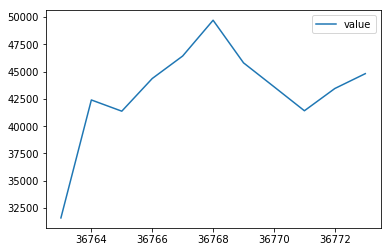

In [50]:
data_Vage.plot.line()

**Переходим к решению второй задачи:**

In [4]:
# импортируем Beautiful Soup
import bs4
import csv

In [5]:
def read_url(url):
    """ Читает содержимое сайта """
    import urllib.request    
    with urllib.request.urlopen(url) as webpage:
        text = webpage.read().decode('utf-8')
    return text

In [35]:
text = read_url("http://dfedorov.spb.ru/python3/forecast.html")

In [7]:
bs = bs4.BeautifulSoup(text, 'html.parser')

In [11]:
special_list_d = bs.select('.forecast-label')
special_list_w = bs.select('.forecast-text')

In [12]:
print(special_list_d[1])

<div class="forecast-label"><b>Пятница</b></div>


In [13]:
answ1=[]

In [14]:
for i in range(0,len(special_list_d)):
    answ1.append(special_list_d[i].text)

In [15]:
answ2=[]

In [16]:
for i in range(0,len(special_list_w)):
    answ2.append(special_list_w[i].text)

In [30]:
almostAnswer=list(zip(answ1,answ2))

In [31]:
answer=[]

In [32]:
for x in almostAnswer:
    answer.append(list(x))    

In [34]:
with open('AnswerTab.csv','w') as tabFile:
    writer=csv.writer(tabFile, delimiter=';')
    for l in answer:
        writer.writerow(l)
    print('Done')

Done
